#### Set-up

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
x, y = mnist.data, mnist.target

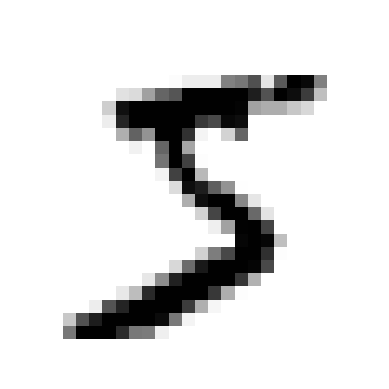

In [28]:
def plot_digit (image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap ="binary")
    plt.axis("off")


some_digit = x[0]
plot_digit(some_digit)
plt.show()

In [30]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

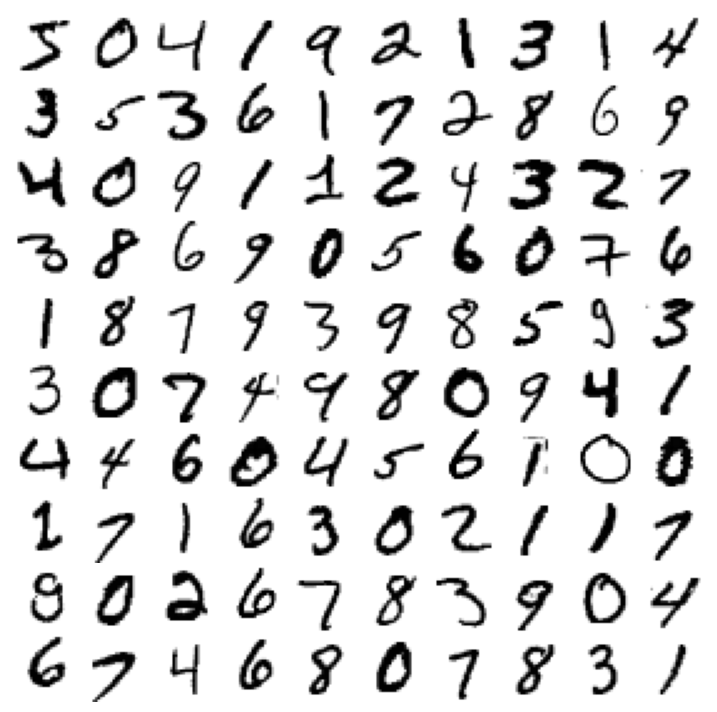

In [ ]:
plt.figure(figsize=(9,9))
for idx, image_data in enumerate(x[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

In [46]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

why is SGDCLassifier a linear_model? check on sklearn?

In [44]:
some_digit = x[0] #first line is a 5
sgd_clf.predict([some_digit])

array([ True])

#### Confusion Matrix & precision / recall

general idea: count the number of times instances of class A are classified as class B, for all A/B pairs. A matrix plots the A in a column (for instance 5) and b in a row (for instance 3). This shows how often 5 is classified as 3 (the model is confused)

In [49]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

confusion matrix for a binary classification has four outputs because in this case it can either be non five or a five. On top left are true negatives (correctly predicted non fives), on top right are false negatives (incorrectly predicted non fives). Bottum left are true positives (correctly predicted fives) and bottum right false positives (incorrectly predicted fives)

TP / FP / FN / FP

Recall / precision use this to give a better indication

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score
recall_score(y_train_5,y_train_pred) # % of how detected fives over total number of fives

0.6511713705958311

In [53]:
precision_score(y_train_5, y_train_pred) # % of correctly predicted fives over total predicted fives

0.8370879772350012

In [ ]:
f1_score(y_train_5, y_train_pred) #harmonic mean of the precision and recall. 
#Regular mean treats all values equally, the harmonic mean gives more weight to low values
#the classifier will get a higher F1 score if both precision as recall are equally high (balanced)


0.7325171197343847

#### Precision and Recall Trade Off / roc curve

In [97]:
some_digit = x[0] #first line is a 5
y_scores = sgd_clf.decision_function([some_digit])
treshhold = 0
check = (y_scores > treshhold)
check
##treshhold of a single example

array([ True])

In [98]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                             method="decision_function")

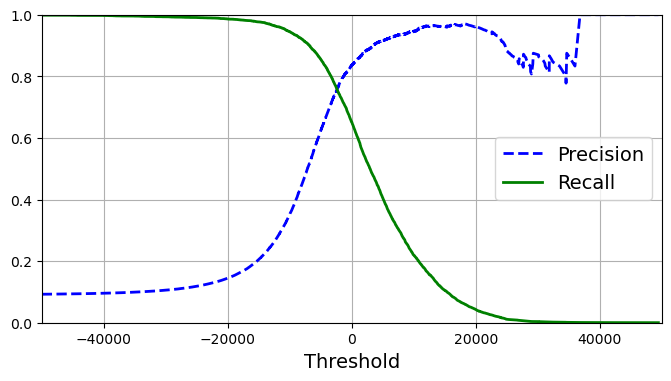

In [101]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
#plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= thresholds).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

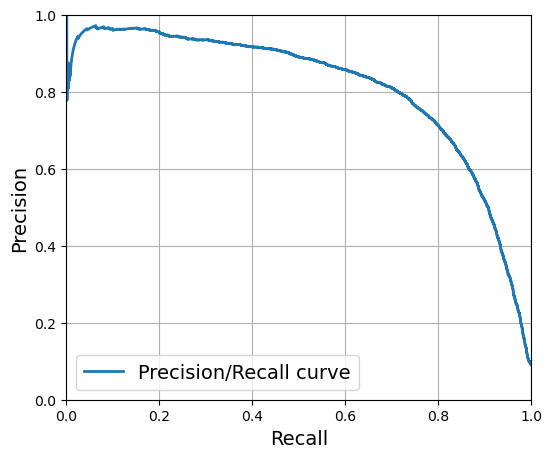

In [102]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [105]:
##90% precision / 50% recall model
precision_90 = (precisions >= 0.90).argmax()
thresholds_90 = thresholds[precision_90]
thresholds_90

3370.0194991439557

In [107]:
y_train_pred_90 = (y_scores >= thresholds_90)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)


0.4799852425751706

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


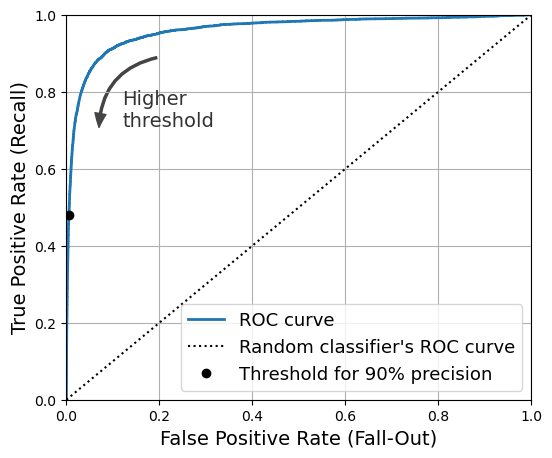

In [114]:
idx_for_threshold_at_90 = (thresholds <= thresholds_90).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                    method="predict_proba")

In [119]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

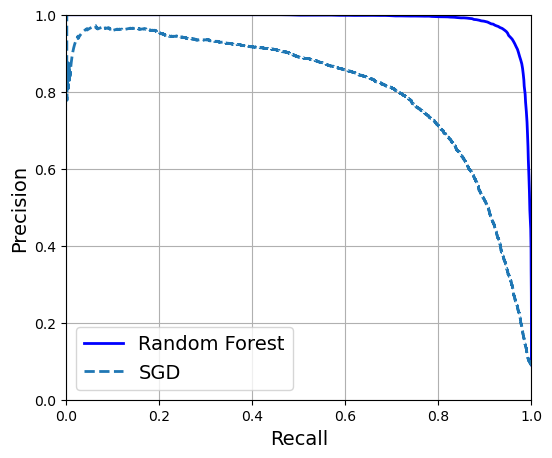

In [121]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [123]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [124]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [125]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [126]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

#### Multiclass Classification